In [2]:
## Libraries ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Prepare data ##

# Load & extract data
data_rain = pd.read_csv('data_mrc/Rainfall_StungTreng.csv')
data_flow = pd.read_csv('data_mrc/Discharge_StungTreng.csv')
data_flowkratie = pd.read_csv('data_mrc/Discharge_Kratie.csv')
gdp_thai = pd.read_csv('data_imf/thailand_gdp_imf.csv', delimiter=';')
gdp_viet = pd.read_csv('data_imf/vietnam_gdp_imf.csv', delimiter=';')

data_rain = data_rain.rename(columns={'Value': 'rainfall'})
data_flow = data_flow.rename(columns={'Value': 'flowrate'})
data_flowkratie = data_flowkratie.rename(columns={'Value': 'flowrate'})
gdp_thai = gdp_thai.rename(columns={'GDP (Billions of U.S. dollars)': 'gdp_thai'})
gdp_viet = gdp_viet.rename(columns={'GDP (Billions of U.S. dollars)': 'gdp_viet'})

data_rain = data_rain[['Timestamp (UTC+07:00)', 'rainfall']]
data_flow = data_flow[['Timestamp (UTC+07:00)', 'flowrate']]
data_flowkratie = data_flowkratie[['Timestamp (UTC+07:00)', 'flowrate']]

data_rain['Timestamp (UTC+07:00)'] = pd.to_datetime(data_rain['Timestamp (UTC+07:00)'])
data_flow['Timestamp (UTC+07:00)'] = pd.to_datetime(data_flow['Timestamp (UTC+07:00)'])
data_flowkratie['Timestamp (UTC+07:00)'] = pd.to_datetime(data_flowkratie['Timestamp (UTC+07:00)'])

# Merge data
data = pd.merge(data_rain, data_flow, on='Timestamp (UTC+07:00)', how='inner')
data['Timestamp (UTC+07:00)'] = pd.to_datetime(data['Timestamp (UTC+07:00)'])
data['year'] = data['Timestamp (UTC+07:00)'].dt.year
data = pd.merge(data, gdp_thai, on='year', how='left')
data = pd.merge(data, gdp_viet, on='year', how='left')
data = data.set_index('Timestamp (UTC+07:00)')

data.head()


rainfall  flowrate  year  gdp_thai  gdp_viet
Timestamp (UTC+07:00)                                                  
2007-03-07 00:00:00+00:00       0.9    2500.0  2007   262.943    98.426
2007-04-10 00:00:00+00:00       0.2    1849.0  2007   262.943    98.426
2007-04-13 00:00:00+00:00       2.0    1571.0  2007   262.943    98.426
2007-04-16 00:00:00+00:00       5.5    1410.0  2007   262.943    98.426
2007-05-01 00:00:00+00:00      15.2    3200.0  2007   262.943    98.426

In [4]:
# Function to create stats dataframe
def calculate_stats(group):
    return pd.DataFrame({
        'min_flowrate': [group['flowrate'].min()],
        'max_flowrate': [group['flowrate'].max()],
        'std_flowrate': [group['flowrate'].std()],
        'total_rainfall': [group['rainfall'].sum()],
        'avg_rainfall': [group['rainfall'].mean()],
        'avg_flowrate': [group['flowrate'].mean()],
        'gdp_thai' : [group['gdp_thai'].mean()],
        'gdp_viet' : [group['gdp_viet'].mean()]
    })

# Function to filter data by month and calculate statistics
def get_monthly_stats(data):
    monthly_stats = {}
    for month in range(1, 13):
        month_name = pd.to_datetime(str(month), format='%m').strftime('%B').lower()
        monthly_data = data[data.index.month == month]
        monthly_stats[month_name] = monthly_data.groupby(monthly_data.index.year).apply(calculate_stats).reset_index(level=1, drop=True)
    return monthly_stats

In [5]:
# Calculate statistics
monthly_stats = get_monthly_stats(data)

In [6]:
monthly_stats['january']

min_flowrate  max_flowrate  std_flowrate  \
Timestamp (UTC+07:00)                                             
2011                    3004.576503   4099.631969    233.415571   
2012                    3839.055057   4889.253093    301.580215   
2013                    3150.743779   3787.487151    138.209702   
2014                    4329.078678   6751.420975    632.061369   
2015                    3753.211358   4761.193745    276.394512   
2016                    2876.209168   3960.093790    314.585371   
2017                    3942.741759   5504.826880    403.823916   
2018                    4962.832013   5580.739580    165.387949   
2019                    4525.780009   7563.556526    953.376426   
2020                    2561.920435   3839.055057    395.540817   
2022                    3925.409918   3925.409918           NaN   
2023                    4152.286988   4543.776199    196.753278   
2024                    3298.728742   5148.043272    530.401286   

                       total_rainfall  avg_rainfall  avg_flowrate  gdp_thai  \
Timestamp (UTC+07:00)                                                         
2011                              0.0      0.000000   3390.719395   370.819   
2012                              0.0      0.000000   4379.983913   397.558   
2013                              0.0      0.000000   3422.226647   420.334   
2014                              0.0      0.000000   5049.361753   407.339   
2015                              0.0      0.000000   4246.180075   401.296   
2016                              0.0      0.000000   3365.629077   413.366   
2017                              0.0      0.000000   4973.147220   456.357   
2018                              0.0      0.000000   5325.397296   506.754   
2019                              0.0      0.000000   5512.287631   543.977   
2020                              0.0      0.000000   3191.426314   500.462   
2022                              1.0      1.000000   3925.409918   495.646   
2023                             14.3      4.766667   4359.519293   514.945   
2024                              0.0      0.000000   3991.223620   548.890   

                       gdp_viet  
Timestamp (UTC+07:00)            
2011                    171.312  
2012                    195.169  
2013                    212.728  
2014                    232.888  
2015                    236.795  
2016                    252.146  
2017                    277.071  
2018                    304.470  
2019                    331.818  
2020                    346.310  
2022                    407.965  
2023                    433.702  
2024                    465.814

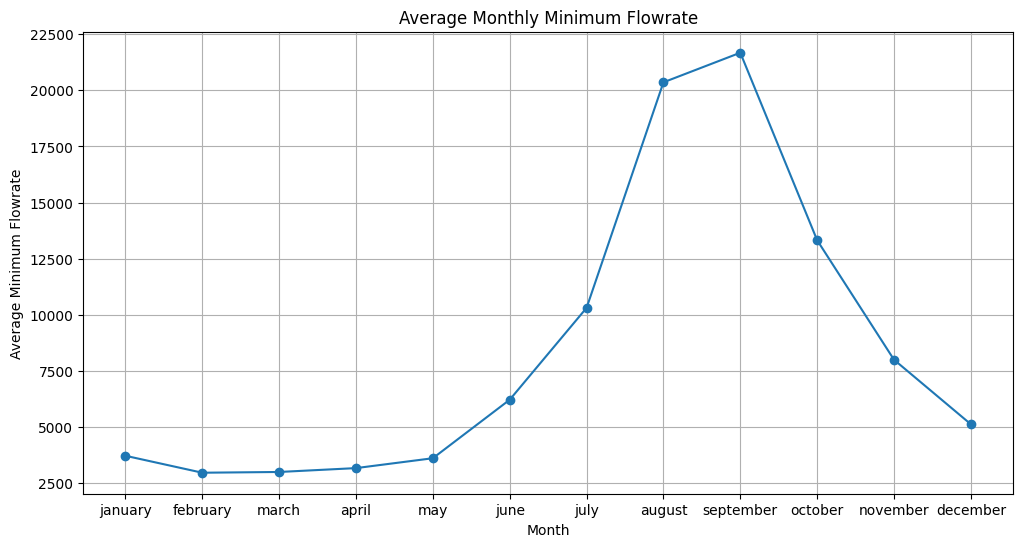

In [7]:
# Function to calculate and plot average minimum flowrate for each month
def plot_avg_min_flowrate(monthly_stats):
    avg_min_flowrates = {}
    for month, stats in monthly_stats.items():
        avg_min_flowrates[month] = stats['min_flowrate'].mean()

    # Sort the months
    months_sorted = sorted(avg_min_flowrates.keys(), key=lambda x: pd.to_datetime(x, format='%B'))
    avg_min_flowrates_sorted = [avg_min_flowrates[month] for month in months_sorted]

    plt.figure(figsize=(12, 6))
    plt.plot(months_sorted, avg_min_flowrates_sorted, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Minimum Flowrate')
    plt.title('Average Monthly Minimum Flowrate')
    plt.grid(True)
    plt.show()

plot_avg_min_flowrate(monthly_stats)

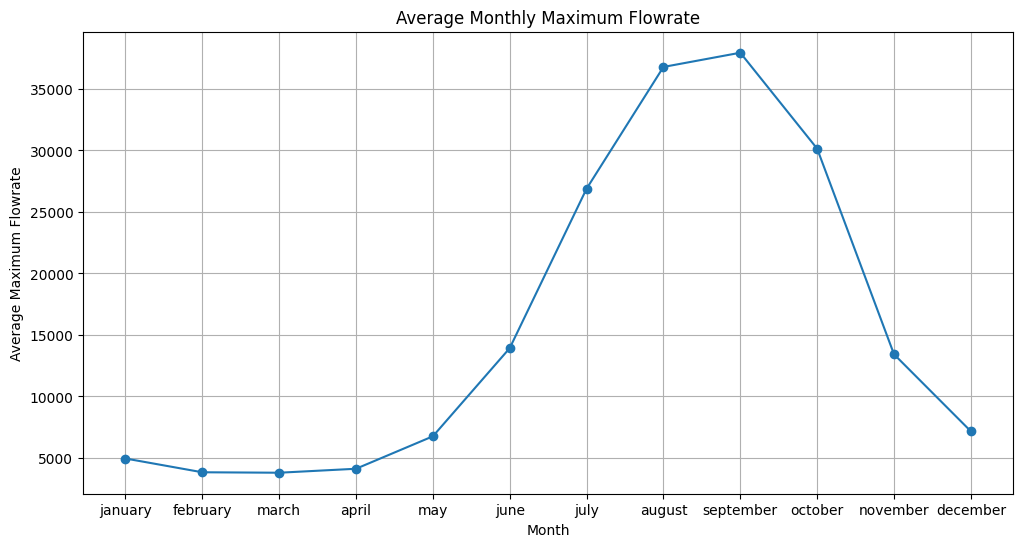

In [8]:
# Function to calculate and plot average maximum flowrate for each month
def plot_avg_max_flowrate(monthly_stats):
    avg_max_flowrates = {}
    for month, stats in monthly_stats.items():
        avg_max_flowrates[month] = stats['max_flowrate'].mean()

    # Sort the months
    months_sorted = sorted(avg_max_flowrates.keys(), key=lambda x: pd.to_datetime(x, format='%B'))
    avg_max_flowrates_sorted = [avg_max_flowrates[month] for month in months_sorted]

    plt.figure(figsize=(12, 6))
    plt.plot(months_sorted, avg_max_flowrates_sorted, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Maximum Flowrate')
    plt.title('Average Monthly Maximum Flowrate')
    plt.grid(True)
    plt.show()

plot_avg_max_flowrate(monthly_stats)

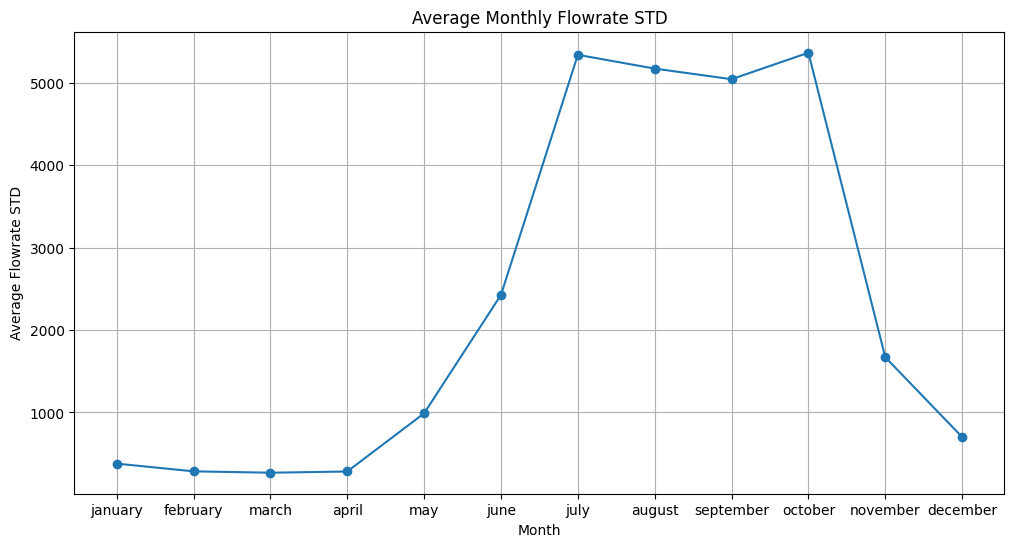

In [9]:
# Function to calculate and plot average std for flowrate for each month
def plot_avg_std(monthly_stats):
    avg_std = {}
    for month, stats in monthly_stats.items():
        avg_std[month] = stats['std_flowrate'].mean()

    # Sort the months
    months_sorted = sorted(avg_std.keys(), key=lambda x: pd.to_datetime(x, format='%B'))
    avg_std_sorted = [avg_std[month] for month in months_sorted]

    plt.figure(figsize=(12, 6))
    plt.plot(months_sorted, avg_std_sorted, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Flowrate STD')
    plt.title('Average Monthly Flowrate STD')
    plt.grid(True)
    plt.show()

plot_avg_std(monthly_stats)

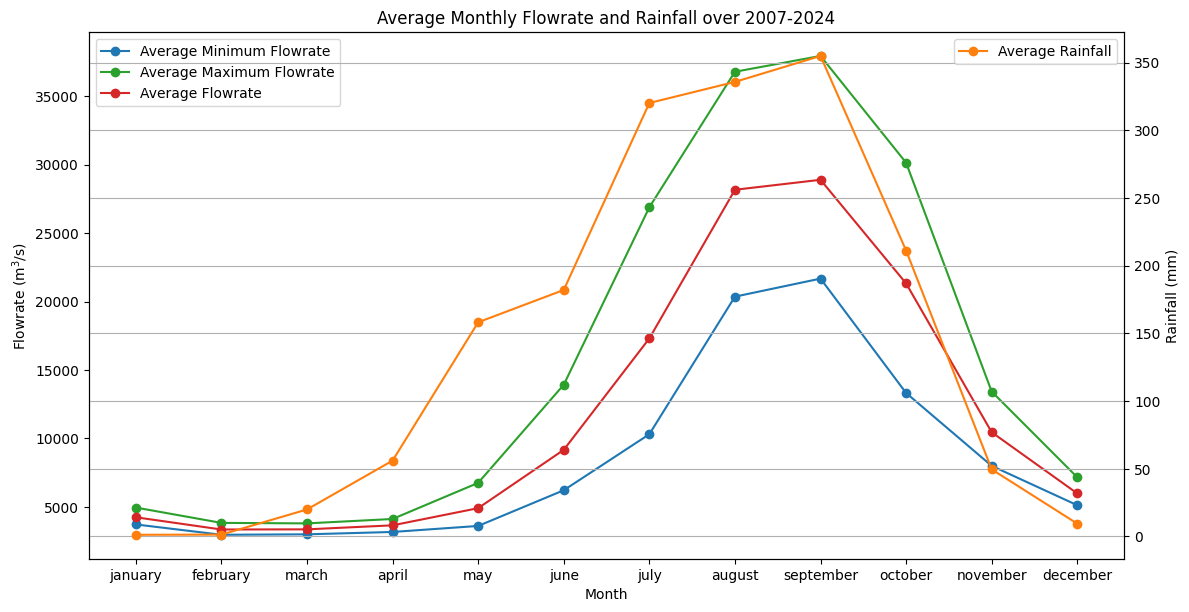

In [10]:
# Function to calculate and plot average flowrates and rainfall for each month
def plot_avg_flowrate(monthly_stats):
    avg_min_flowrates = {}
    avg_max_flowrates = {}
    avg_rainfall = {}
    avg_flowrate = {}
    for month, stats in monthly_stats.items():
        avg_min_flowrates[month] = stats['min_flowrate'].mean()
        avg_max_flowrates[month] = stats['max_flowrate'].mean()
        avg_rainfall[month] = stats['total_rainfall'].mean()
        avg_flowrate[month] = stats['avg_flowrate'].mean()

    # Sort the months
    months_sorted = sorted(avg_min_flowrates.keys(), key=lambda x: pd.to_datetime(x, format='%B'))

    avg_min_flowrates_sorted = [avg_min_flowrates[month] for month in months_sorted]
    avg_max_flowrates_sorted = [avg_max_flowrates[month] for month in months_sorted]
    avg_rainfall_sorted = [avg_rainfall[month] for month in months_sorted]
    avg_flowrate_sorted = [avg_flowrate[month] for month in months_sorted]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Month')
    ax1.set_ylabel('Flowrate (m$^3$/s)')
    ax1.plot(months_sorted, avg_min_flowrates_sorted, marker='o', label='Average Minimum Flowrate', color='tab:blue')
    ax1.plot(months_sorted, avg_max_flowrates_sorted, marker='o', label='Average Maximum Flowrate', color='tab:green')
    ax1.plot(months_sorted, avg_flowrate_sorted, marker='o', label='Average Flowrate', color='tab:red')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Rainfall (mm)')
    ax2.plot(months_sorted, avg_rainfall_sorted, marker='o', label='Average Rainfall', color='tab:orange')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title('Average Monthly Flowrate and Rainfall over 2007-2024')
    plt.grid(True)
    plt.show()

plot_avg_flowrate(monthly_stats)

In [11]:
# Funtion to calculate weekly statistics for every year in a df
def get_weekly_stats(data, method='linear'):
    weekly_stats = data.copy()
    weekly_stats['year'] = weekly_stats.index.year.astype(int)
    weekly_stats['week'] = weekly_stats.index.isocalendar().week.astype(int)
    weekly_stats = weekly_stats.groupby(['year', 'week']).apply(calculate_stats).reset_index()
    
    # Create a complete index of all weeks for all years in the data
    min_year, max_year = data.index.year.min(), data.index.year.max()
    all_weeks = pd.MultiIndex.from_product([range(min_year, max_year + 1), range(1, 53)], names=['year', 'week'])
    # Merge the complete index with the weekly statistics to ensure all weeks are present
    weekly_stats = weekly_stats.set_index(['year', 'week']).reindex(all_weeks).reset_index()
    # Interpolate missing values
    weekly_stats['interpolated'] = weekly_stats.isna().any(axis=1)
    if method == 'polynomial':
        weekly_stats = weekly_stats.interpolate(method=method, order=2, limit_direction='both')
    elif method == 'spline':
        weekly_stats = weekly_stats.interpolate(method=method, order=3, limit_direction='both')
    else:
        weekly_stats = weekly_stats.interpolate(method=method, limit_direction='both')
        
    weekly_stats['start_of_week'] = weekly_stats.apply(lambda row: pd.to_datetime(f"{row['year']}-W{int(row['week']):02d}-1", format="%Y-W%U-%w").date(), axis=1)
    weekly_stats['code'] = weekly_stats['week'].astype(str) + '-' + weekly_stats['year'].astype(str)
    weekly_stats = weekly_stats.drop(columns=['std_flowrate', 'level_2'])
    weekly_stats.dropna(inplace=True)
    return weekly_stats

weekly_stats = get_weekly_stats(data,'polynomial')
weekly_stats.head()

year  week  min_flowrate  max_flowrate  total_rainfall  avg_rainfall  \
9   2007    10   2500.000000   2500.000000         0.90000      0.900000   
10  2007    11   2374.124037   2691.647522         3.25502     -1.776873   
11  2007    12   2218.286056   2722.371283         4.56253     -3.095309   
12  2007    13   2032.486056   2592.171283         4.82253     -3.055309   
13  2007    14   1816.724037   2301.047522         4.03502     -1.656873   

    avg_flowrate  gdp_thai  gdp_viet  interpolated start_of_week     code  
9    2500.000000   262.943    98.426          True    2007-03-12  10-2007  
10   2521.046213   262.943    98.426          True    2007-03-19  11-2007  
11   2452.569319   262.943    98.426          True    2007-03-26  12-2007  
12   2294.569319   262.943    98.426          True    2007-04-02  13-2007  
13   2047.046213   262.943    98.426          True    2007-04-09  14-2007

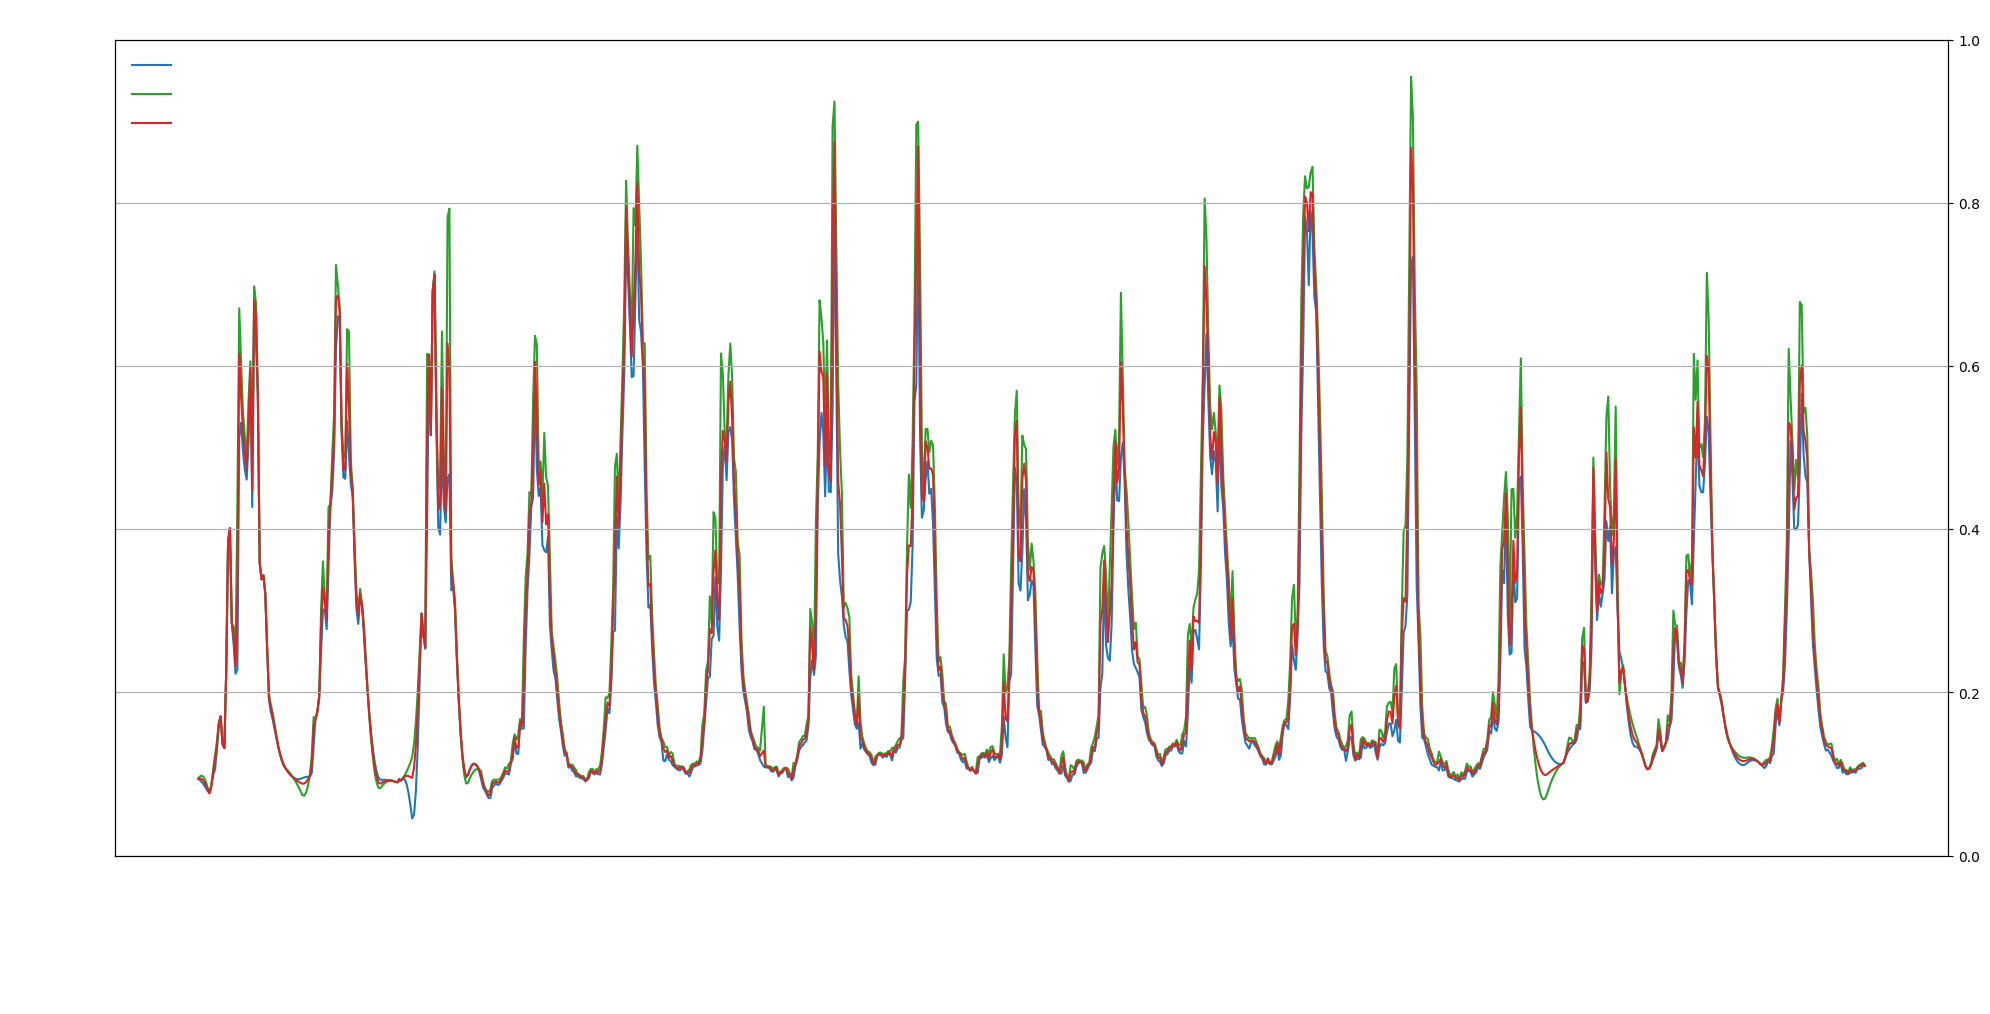

In [12]:
# Function to calculate and plot average flowrates and rainfall for each week
def plot_weekly(weekly_stats):
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    fig.patch.set_facecolor('none')

    ax1.set_facecolor('none')
    ax1.set_xlabel('Week', color='white', fontsize=16)  # Increase font size for x-axis label
    ax1.set_ylabel('Flowrate (m$^3$/s)', color='white', fontsize=16)  # Increase font size for y-axis label
    ax1.tick_params(axis='x', colors='white', labelsize=14)  # Increase font size for x-axis ticks
    ax1.tick_params(axis='y', colors='white', labelsize=14)  # Increase font size for y-axis ticks
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['min_flowrate'], label='Min Flowrate', color='tab:blue')
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['max_flowrate'], label='Max Flowrate', color='tab:green')
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['avg_flowrate'], label='Average Flowrate', color='tab:red')
    
    legend = ax1.legend(loc='upper left', frameon=False, fontsize=14)  # Increase font size for legend
    for text in legend.get_texts():
        text.set_color('white')
        
    ax2 = ax1.twinx()
    ax2.set_facecolor('none')
    
    n = len(weekly_stats['start_of_week'])
    step = n // 25 if n > 25 else 1
    ax1.set_xticks(weekly_stats['start_of_week'][::step])
    ax1.set_xticklabels(weekly_stats['start_of_week'][::step], rotation=90, fontsize=14, color='white')  # Increase font size for x-axis tick labels

    fig.tight_layout()
    plt.xticks(rotation=90, fontsize=14, color='white')  # Increase font size for x-ticks
    plt.title('Weekly stats over 2007-2024', color='white', fontsize=20)  # Increase font size for title
    plt.grid(True)
    plt.show()


plot_weekly(weekly_stats)

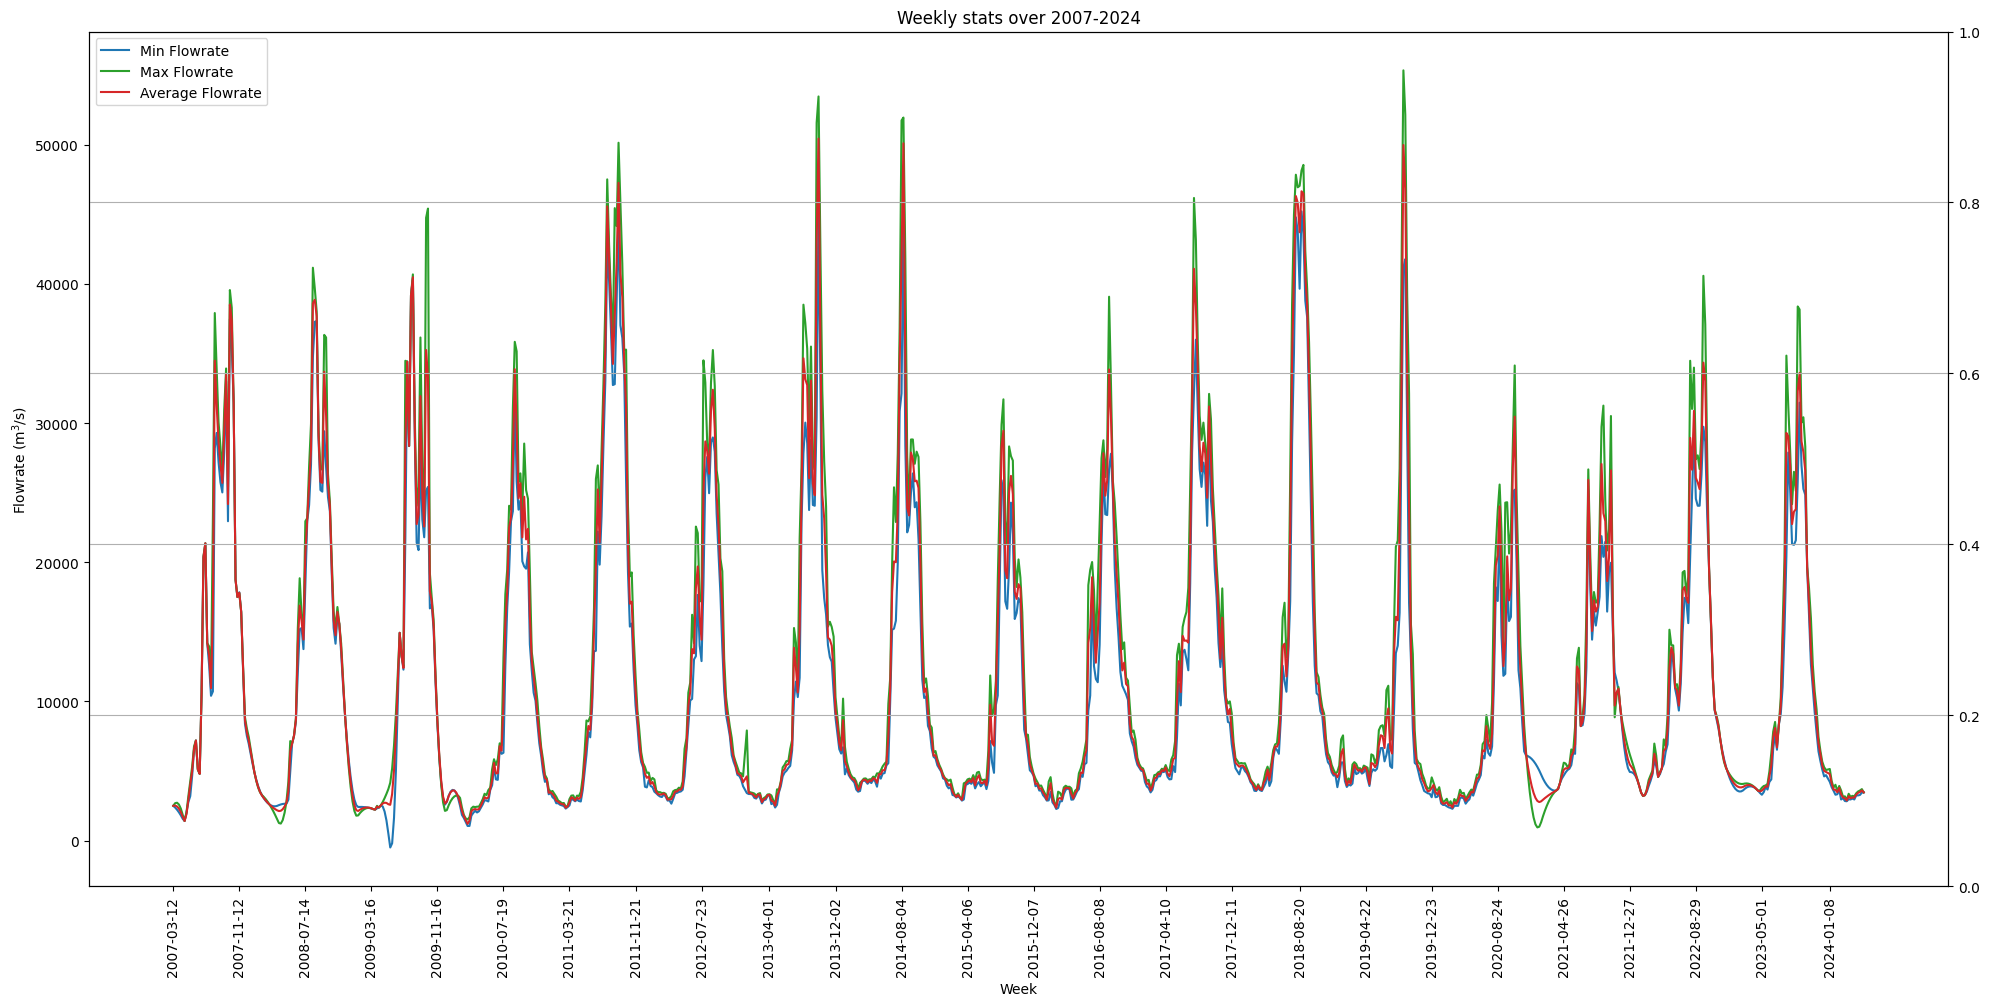

In [13]:
# Function to calculate and plot average flowrates and rainfall for each week
def plot_weekly(weekly_stats):
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    fig.patch.set_facecolor('none')
    
    ax1.set_facecolor('none')
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Flowrate (m$^3$/s)')
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['min_flowrate'], label='Min Flowrate', color='tab:blue')
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['max_flowrate'], label='Max Flowrate', color='tab:green')
    ax1.plot(weekly_stats['start_of_week'], weekly_stats['avg_flowrate'], label='Average Flowrate', color='tab:red')
    legend = ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    
    
    # Set x-ticks to show fewer labels
    n = len(weekly_stats['start_of_week'])
    step = n // 25 if n > 25 else 1
    ax1.set_xticks(weekly_stats['start_of_week'][::step])
    ax1.set_xticklabels(weekly_stats['start_of_week'][::step], rotation=90, fontsize=10)

    fig.tight_layout()
    plt.xticks(rotation=90, fontsize=8)
    plt.title('Weekly stats over 2007-2024')
    plt.grid(True)
    plt.show()


plot_weekly(weekly_stats)

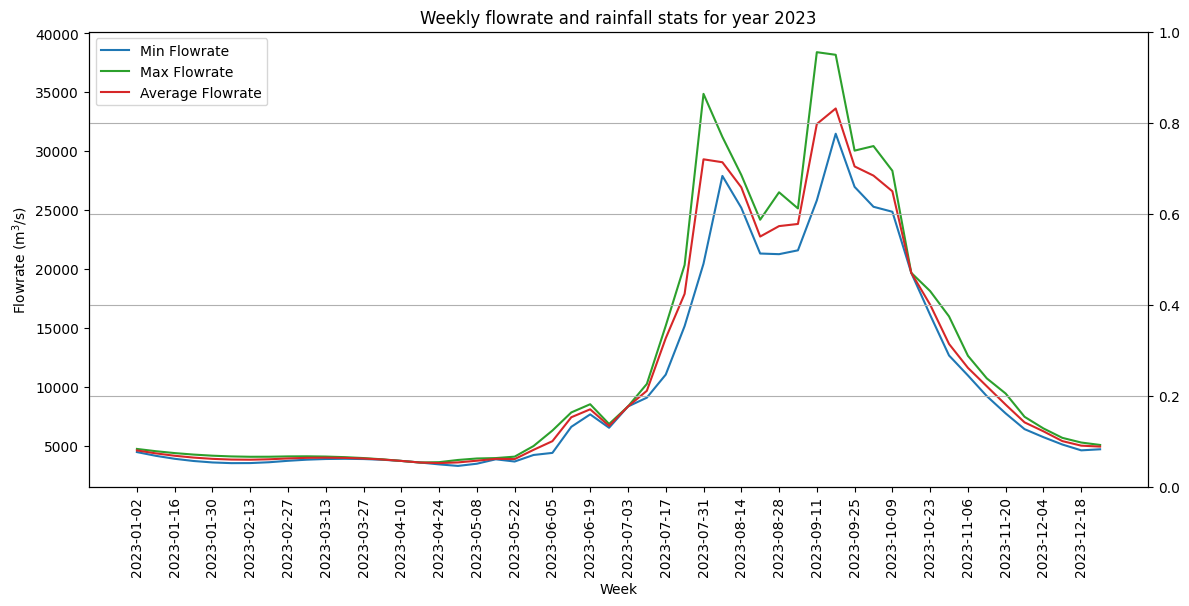

In [14]:
# plot weekly stats for a specific year

def plot_weekly_yearly(weekly_stats, year):
    weekly_stats_year = weekly_stats[weekly_stats['year'] == year]
    
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Week')
    ax1.set_ylabel('Flowrate (m$^3$/s)')
    ax1.plot(weekly_stats_year['start_of_week'], weekly_stats_year['min_flowrate'], label='Min Flowrate', color='tab:blue')
    ax1.plot(weekly_stats_year['start_of_week'], weekly_stats_year['max_flowrate'], label='Max Flowrate', color='tab:green')
    ax1.plot(weekly_stats_year['start_of_week'], weekly_stats_year['avg_flowrate'], label='Average Flowrate', color='tab:red')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    #ax2.set_ylabel('Rainfall (mm)')
    #ax2.plot(weekly_stats_year['start_of_week'], weekly_stats_year['total_rainfall'], label='Average rainfall', color='tab:orange')
    #ax2.legend(loc='upper right')

    # Set x-ticks to show fewer labels
    n = len(weekly_stats_year['start_of_week'])
    step = n // 20 if n > 20 else 1
    ax1.set_xticks(weekly_stats_year['start_of_week'][::step])
    ax1.set_xticklabels(weekly_stats_year['start_of_week'][::step], rotation=90)

    fig.tight_layout()
    plt.title(f'Weekly flowrate and rainfall stats for year {year}')
    plt.grid(True)
    plt.show()
    
plot_weekly_yearly(weekly_stats, 2023)

In [15]:
# plot all years stats

def plot_all_years(weekly_stats):
    years = weekly_stats['year'].unique()
    for year in years:
        plot_weekly_yearly(weekly_stats, year)

#plot_all_years(weekly_stats)

In [16]:
## Statistics analysis ##

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot time series decomposition
def plot_decomposition(data, column):
    result = seasonal_decompose(data[column], model='additive', period=52)
    fig = result.plot()
    fig.set_size_inches(14, 10)
    fig.suptitle('Time Series Decomposition')
    plt.show()

# Function to plot moving averages
def plot_moving_averages(data, column, window):
    data[f'{column}_rolling_mean'] = data[column].rolling(window=window).mean()
    data[f'{column}_rolling_std'] = data[column].rolling(window=window).std()
    
    plt.figure(figsize=(14, 7))
    plt.plot(data[column], label='Original')
    plt.plot(data[f'{column}_rolling_mean'], label=f'Rolling Mean (window={window})')
    plt.plot(data[f'{column}_rolling_std'], label=f'Rolling Std (window={window})')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title('Rolling Mean and Std (window={window})')
    plt.legend(loc='best')
    plt.show()

# Function to plot ACF and PACF
def plot_acf_pacf(data, column, lags=52):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    # Autocorrelation Function (ACF)
    plot_acf(data[column].dropna(), ax=axes[0], lags=lags)
    axes[0].set_title('Autocorrelation Function')
    
    # Partial Autocorrelation Function (PACF)
    plot_pacf(data[column].dropna(), ax=axes[1], lags=lags)
    axes[1].set_title('Partial Autocorrelation Function')
    
    plt.show()

# Store trends data in a df for all columns and gdp
def get_trends(data, columns):
    trends = data.copy()
    for column in columns:
        result = seasonal_decompose(trends[column], model='additive', period=52)
        trends[f'{column}_trend'] = result.trend
    return trends

trends = get_trends(weekly_stats, ['min_flowrate', 'max_flowrate', 'avg_flowrate', 'total_rainfall'])

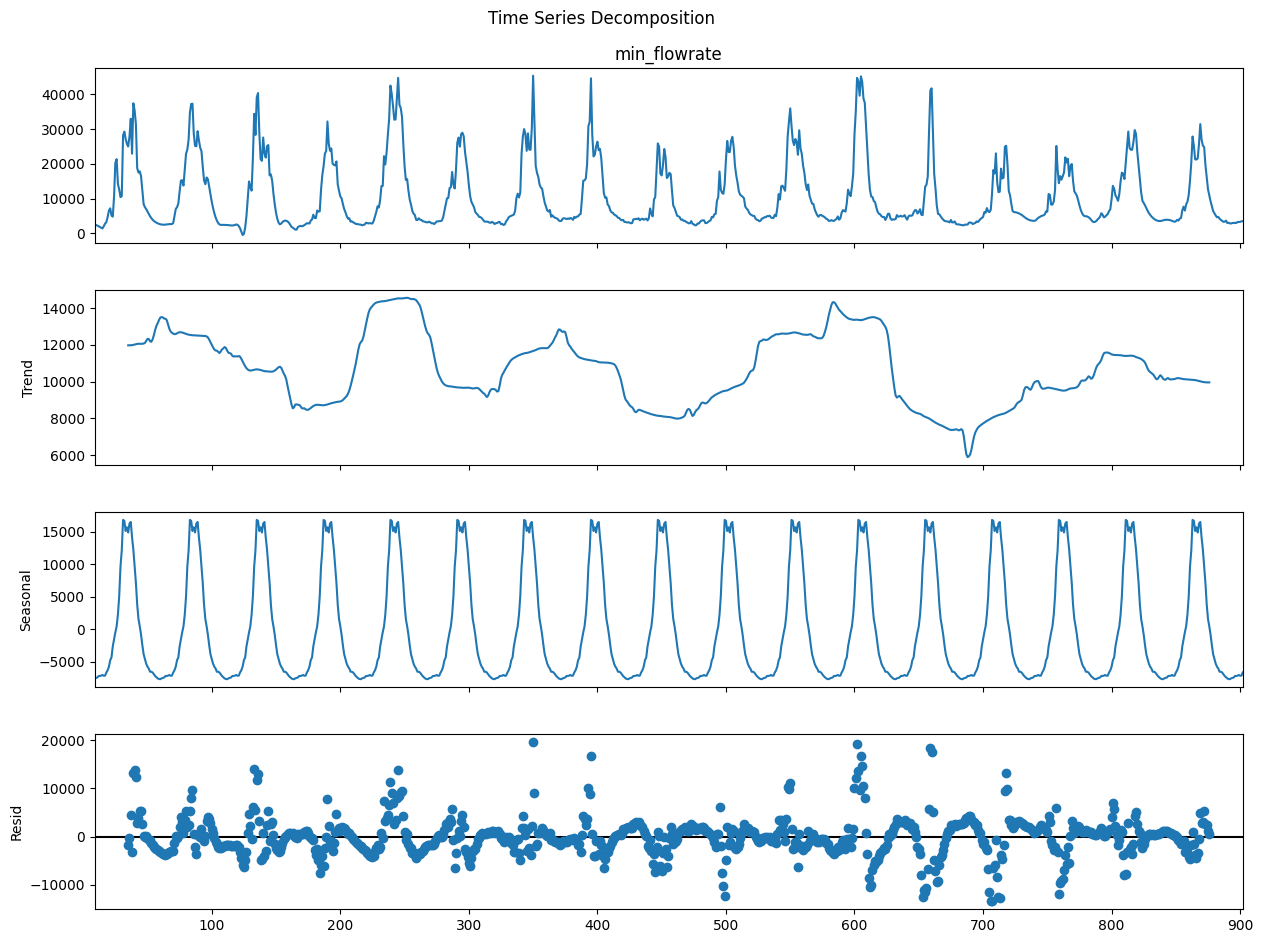

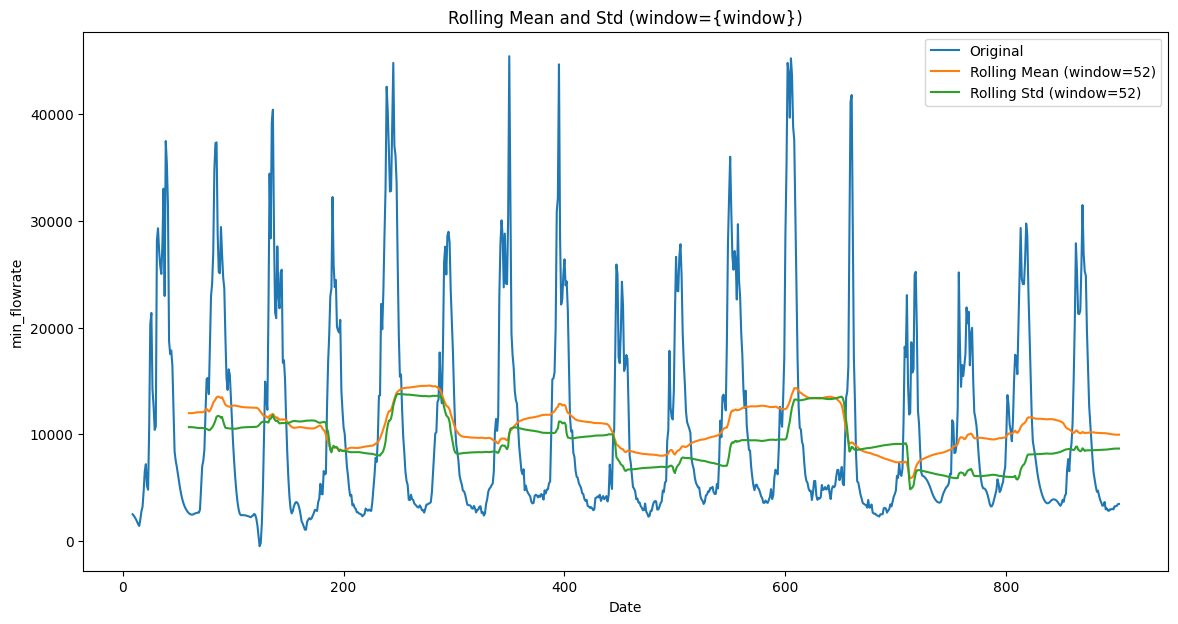

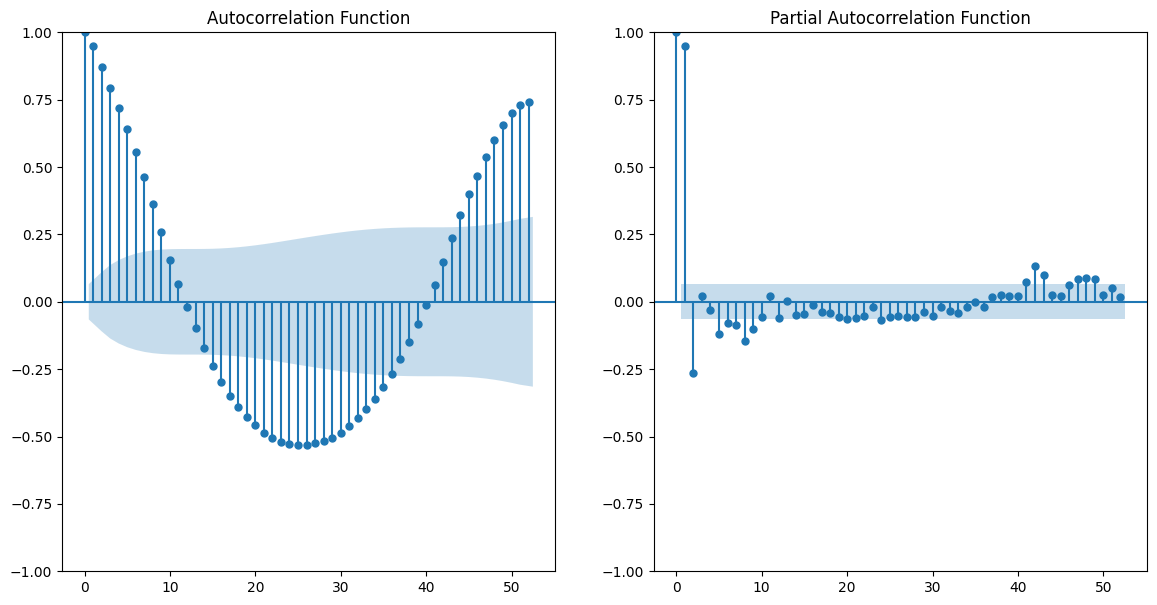

In [17]:
# Plots for minimum flowrate

plot_decomposition(weekly_stats, 'min_flowrate')
plot_moving_averages(weekly_stats, 'min_flowrate', window=52)
plot_acf_pacf(weekly_stats, 'min_flowrate', lags=52)

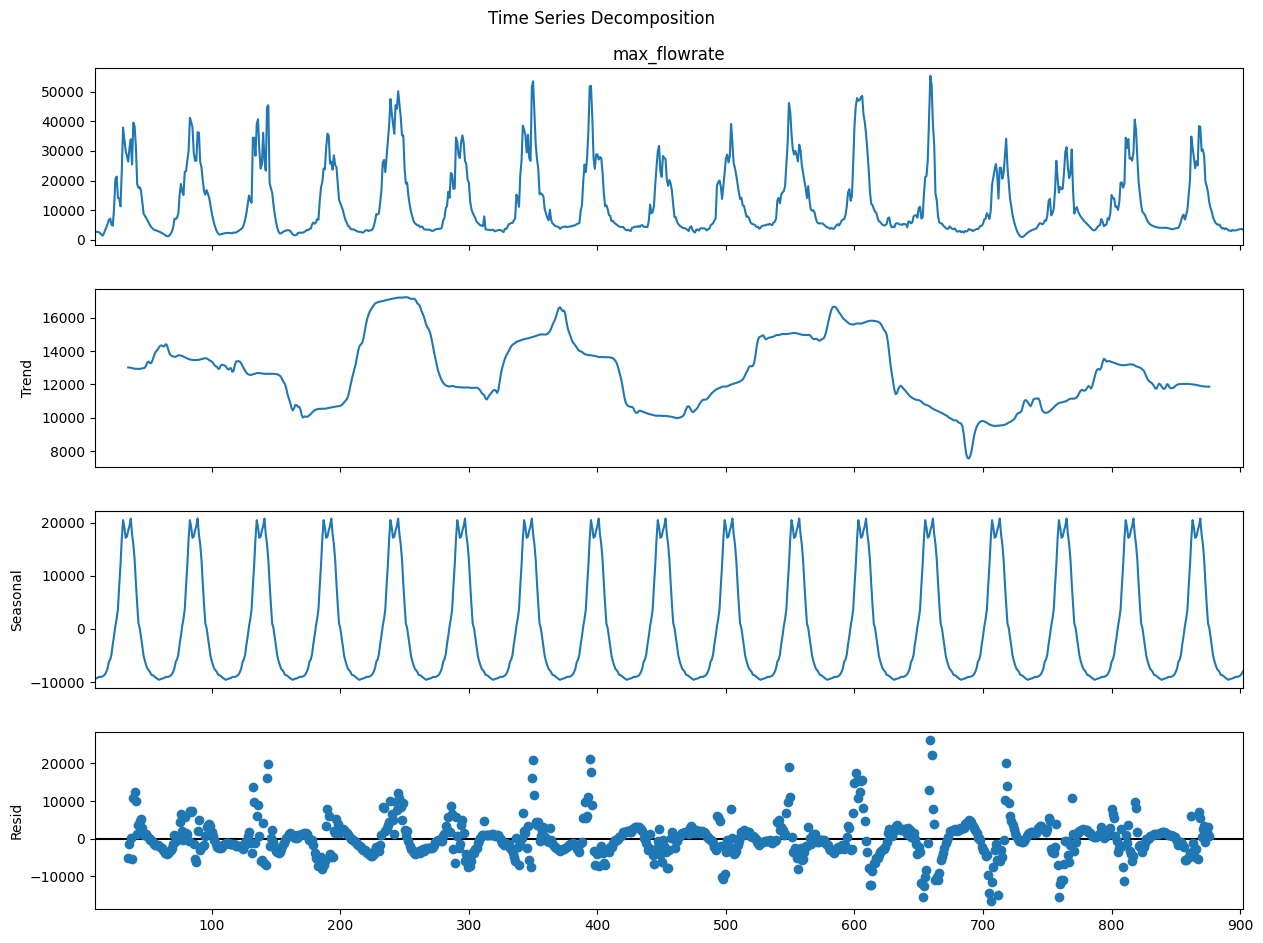

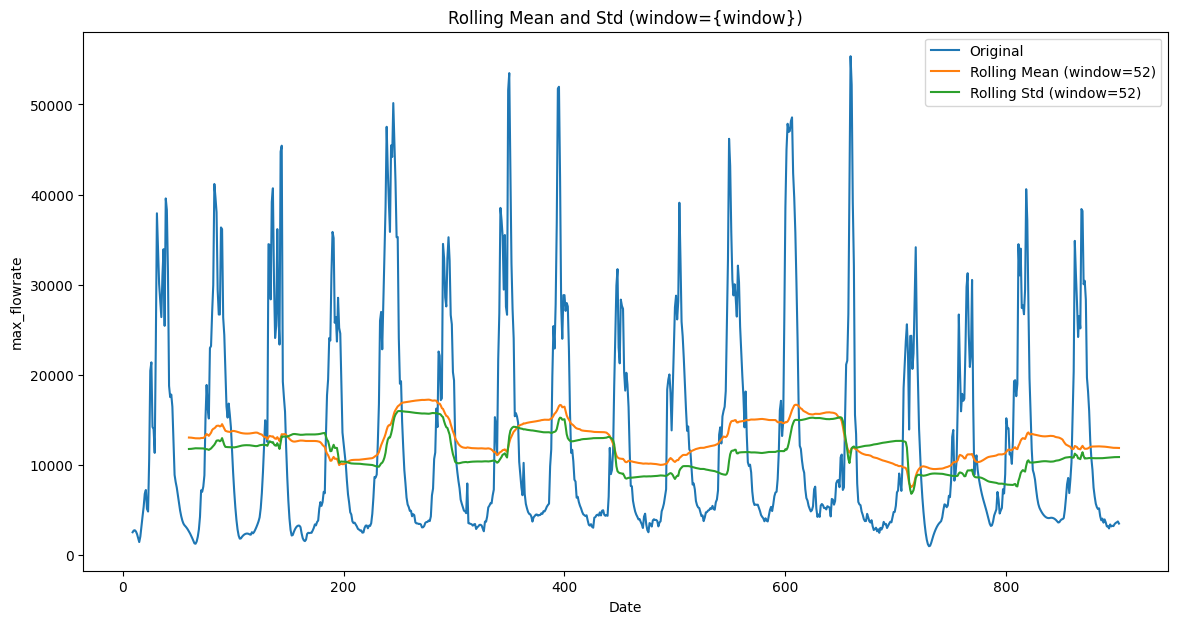

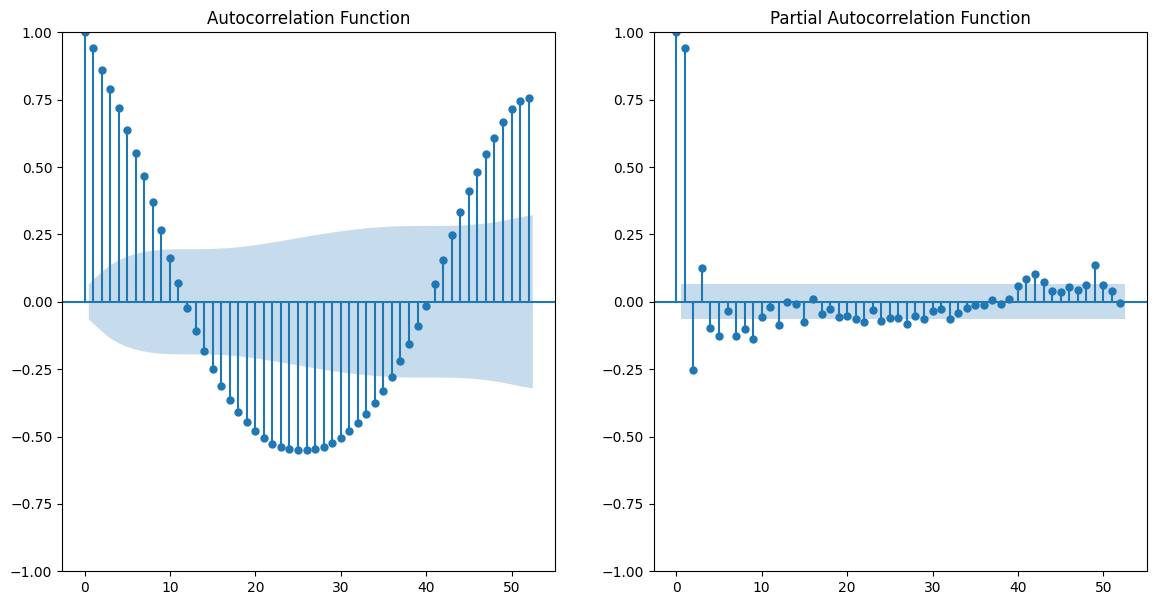

In [18]:
## plots for maximum flowrate

plot_decomposition(weekly_stats, 'max_flowrate')
plot_moving_averages(weekly_stats, 'max_flowrate', window=52)
plot_acf_pacf(weekly_stats, 'max_flowrate', lags=52)

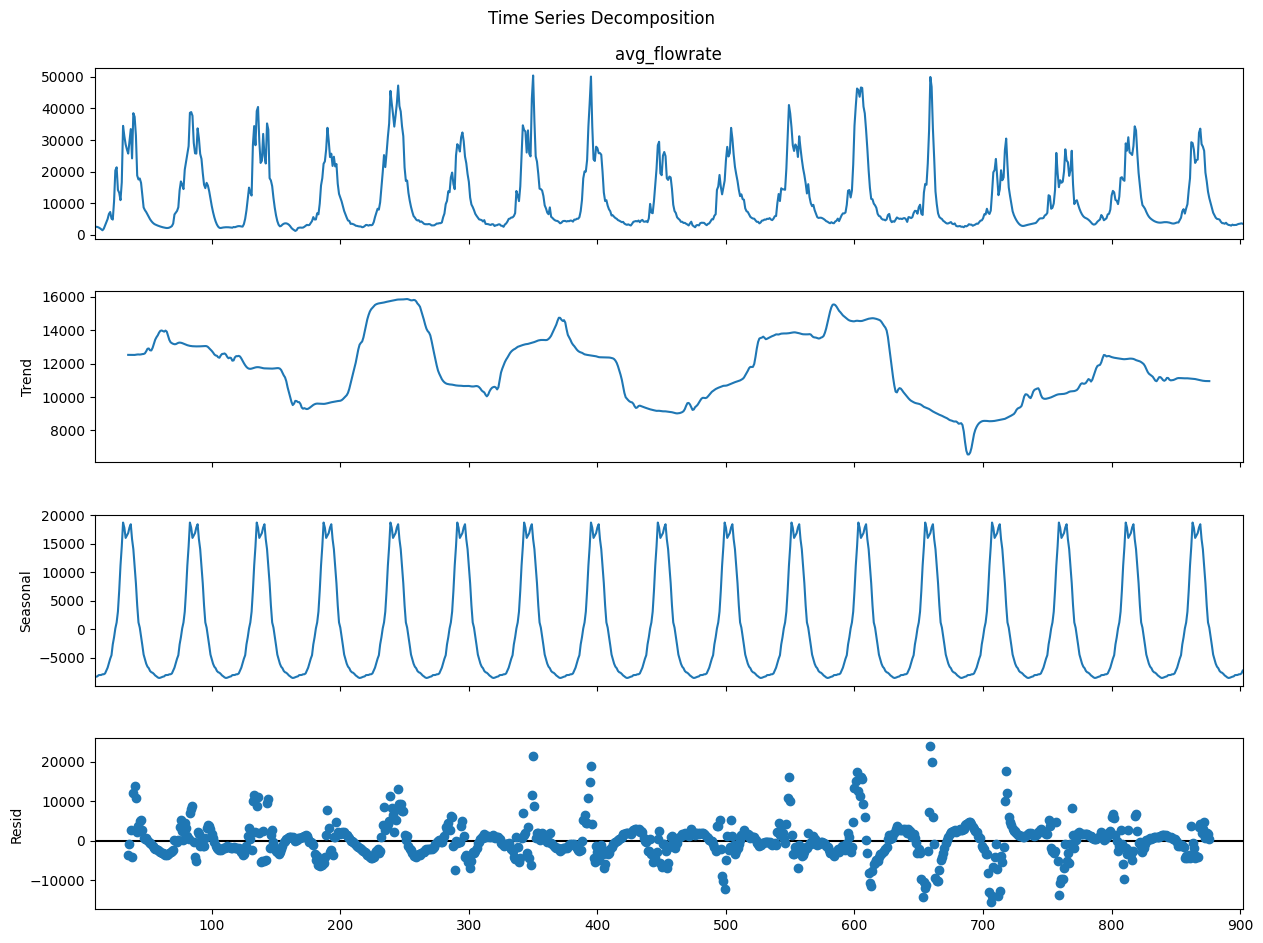

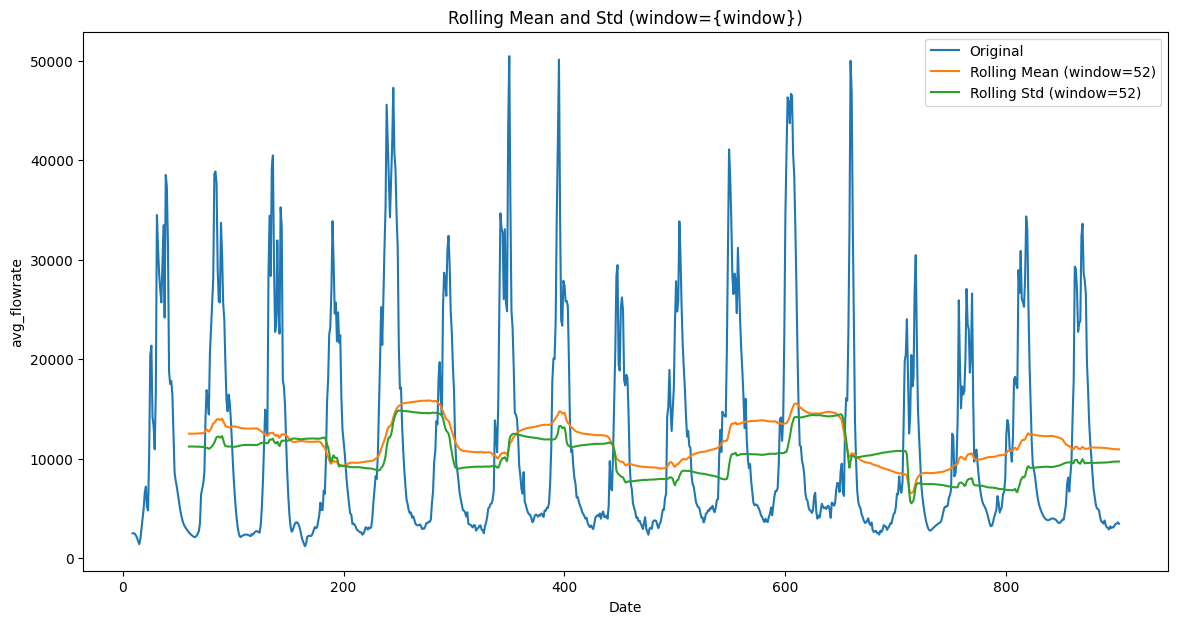

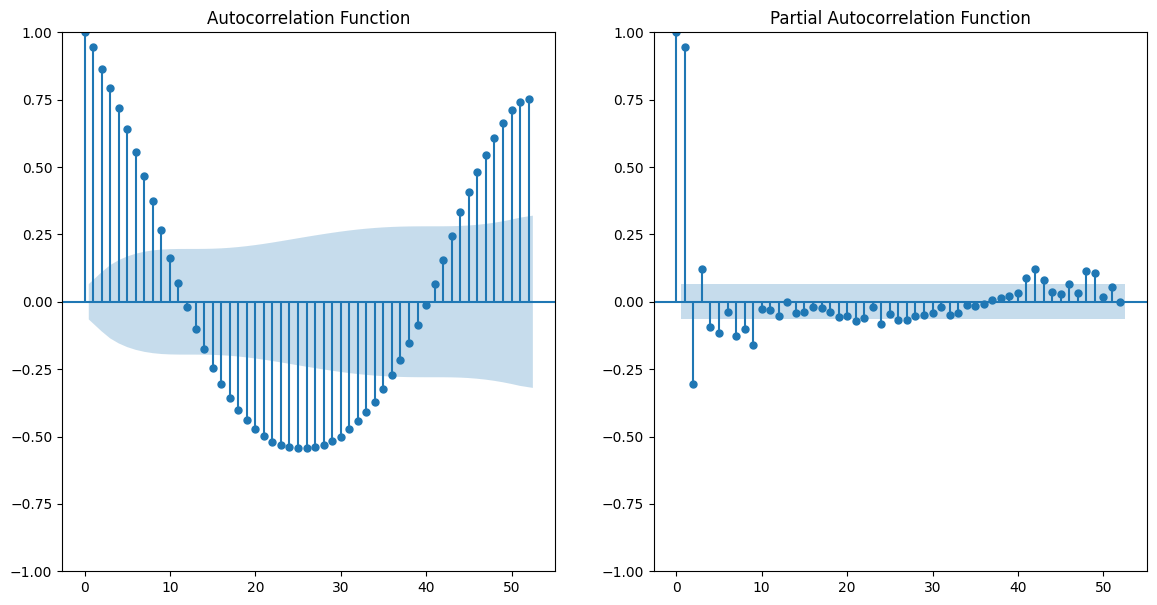

In [19]:
## plots for average flowrate

plot_decomposition(weekly_stats, 'avg_flowrate')
plot_moving_averages(weekly_stats, 'avg_flowrate', window=52)
plot_acf_pacf(weekly_stats, 'avg_flowrate', lags=52)

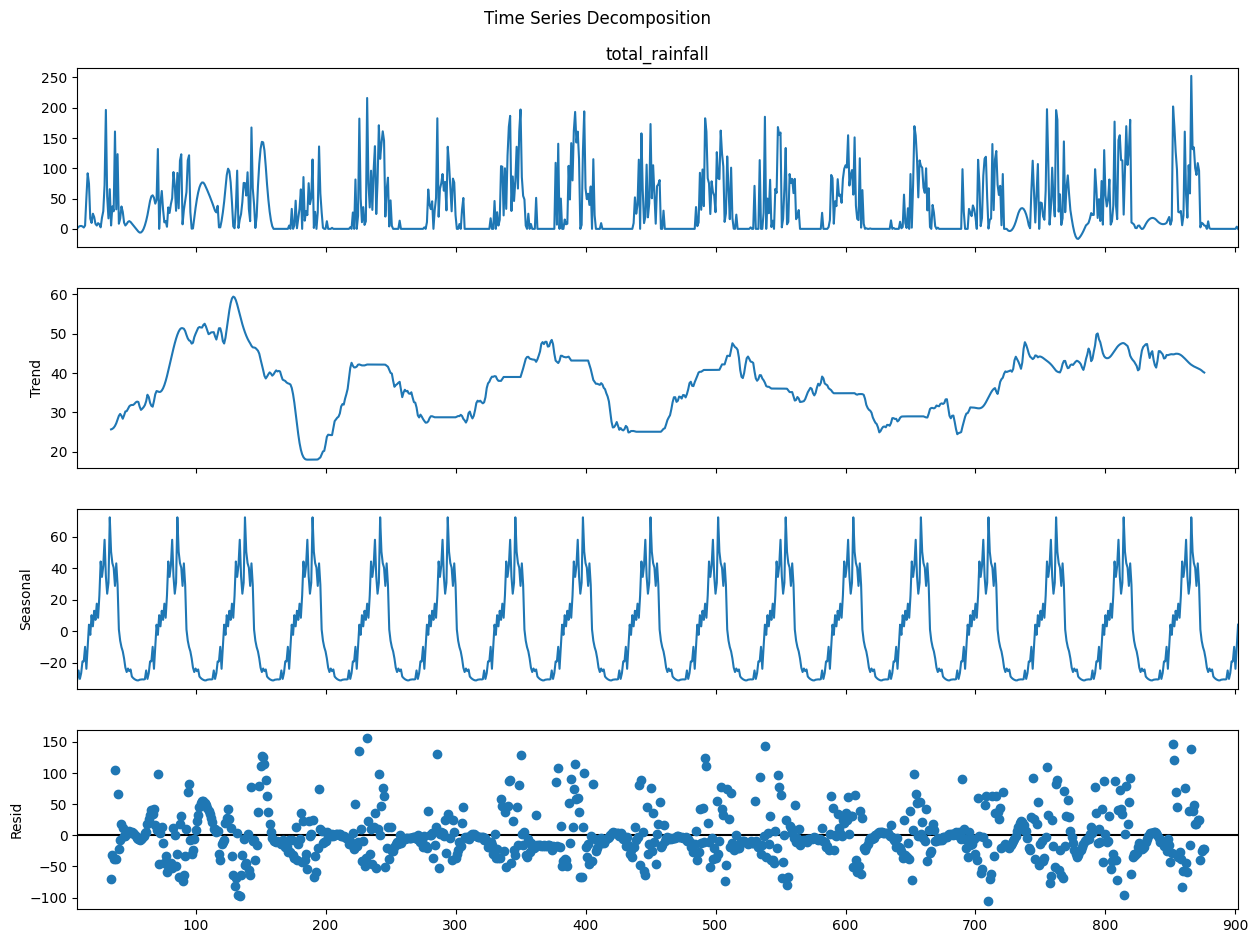

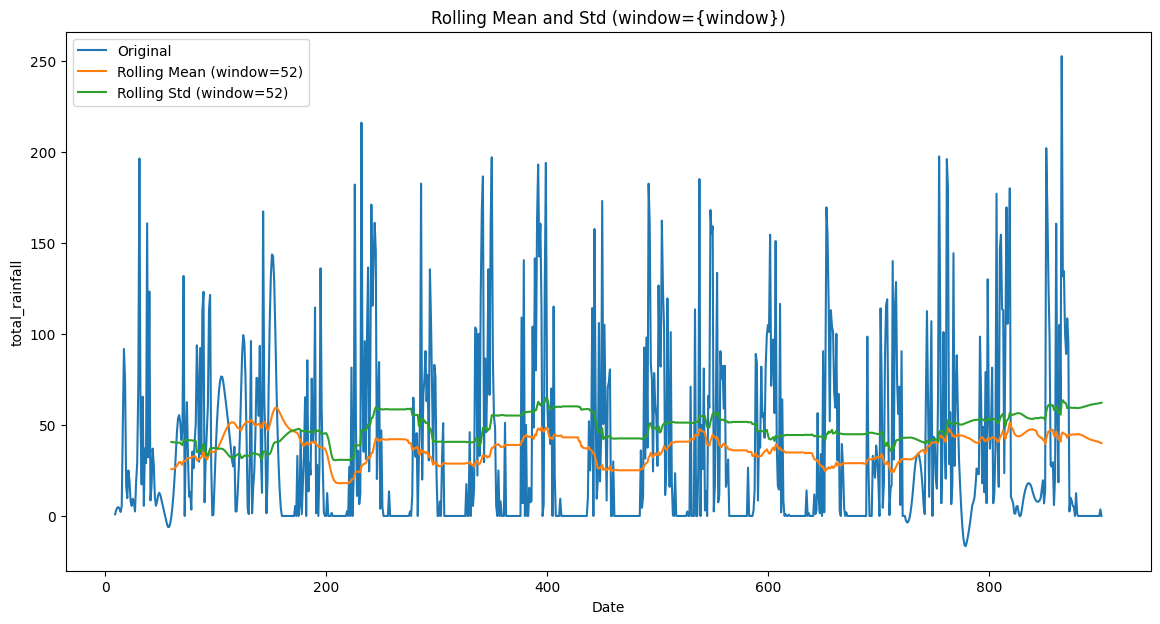

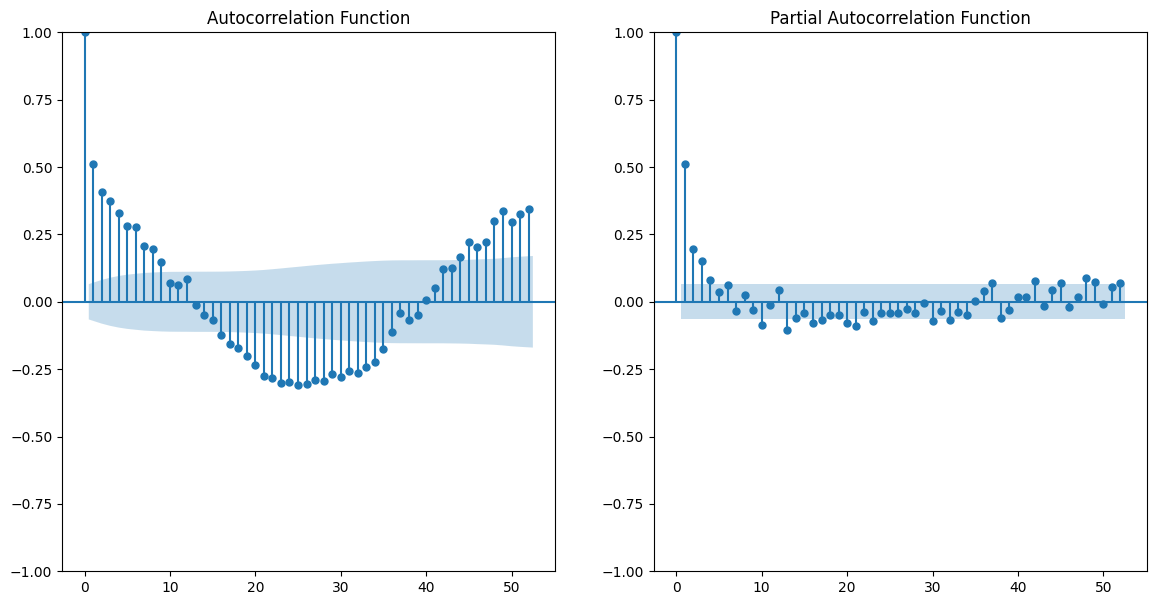

In [20]:
## plots for rainfall

plot_decomposition(weekly_stats, 'total_rainfall')
plot_moving_averages(weekly_stats, 'total_rainfall', window=52)
plot_acf_pacf(weekly_stats, 'total_rainfall', lags=52)


In [21]:
## print the percentage of created values for each year in the dataset ##

interpolation = weekly_stats[weekly_stats['interpolated'] == True]
interpolation = interpolation.groupby('year').size() / weekly_stats.groupby('year').size()
interpolation = interpolation.fillna(0) * 100
print(interpolation)

year
2007    55.813953
2008    46.153846
2009    71.153846
2010     7.692308
2011     0.000000
2012     0.000000
2013     0.000000
2014     0.000000
2015     0.000000
2016     0.000000
2017     0.000000
2018     0.000000
2019     0.000000
2020     5.769231
2021    44.230769
2022    44.230769
2023    36.538462
2024     5.263158
dtype: float64


                min_flowrate  max_flowrate  avg_flowrate  avg_rainfall  \
min_flowrate        1.000000      0.977465      0.992704      0.360862   
max_flowrate        0.977465      1.000000      0.994515      0.353773   
avg_flowrate        0.992704      0.994515      1.000000      0.360821   
avg_rainfall        0.360862      0.353773      0.360821      1.000000   
total_rainfall      0.490526      0.532165      0.518437      0.747148   

                total_rainfall  
min_flowrate          0.490526  
max_flowrate          0.532165  
avg_flowrate          0.518437  
avg_rainfall          0.747148  
total_rainfall        1.000000  


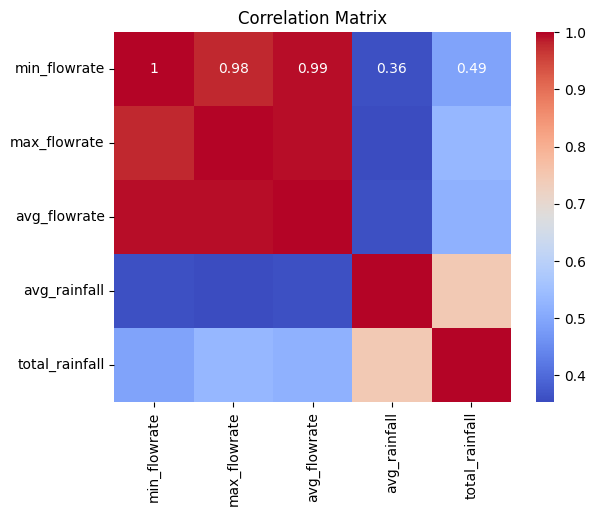

In [22]:
# Calculate correlation matrix
correlation_matrix = weekly_stats[['min_flowrate', 'max_flowrate', 'avg_flowrate', 'avg_rainfall', 'total_rainfall']].corr()

# Print the correlation matrix
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

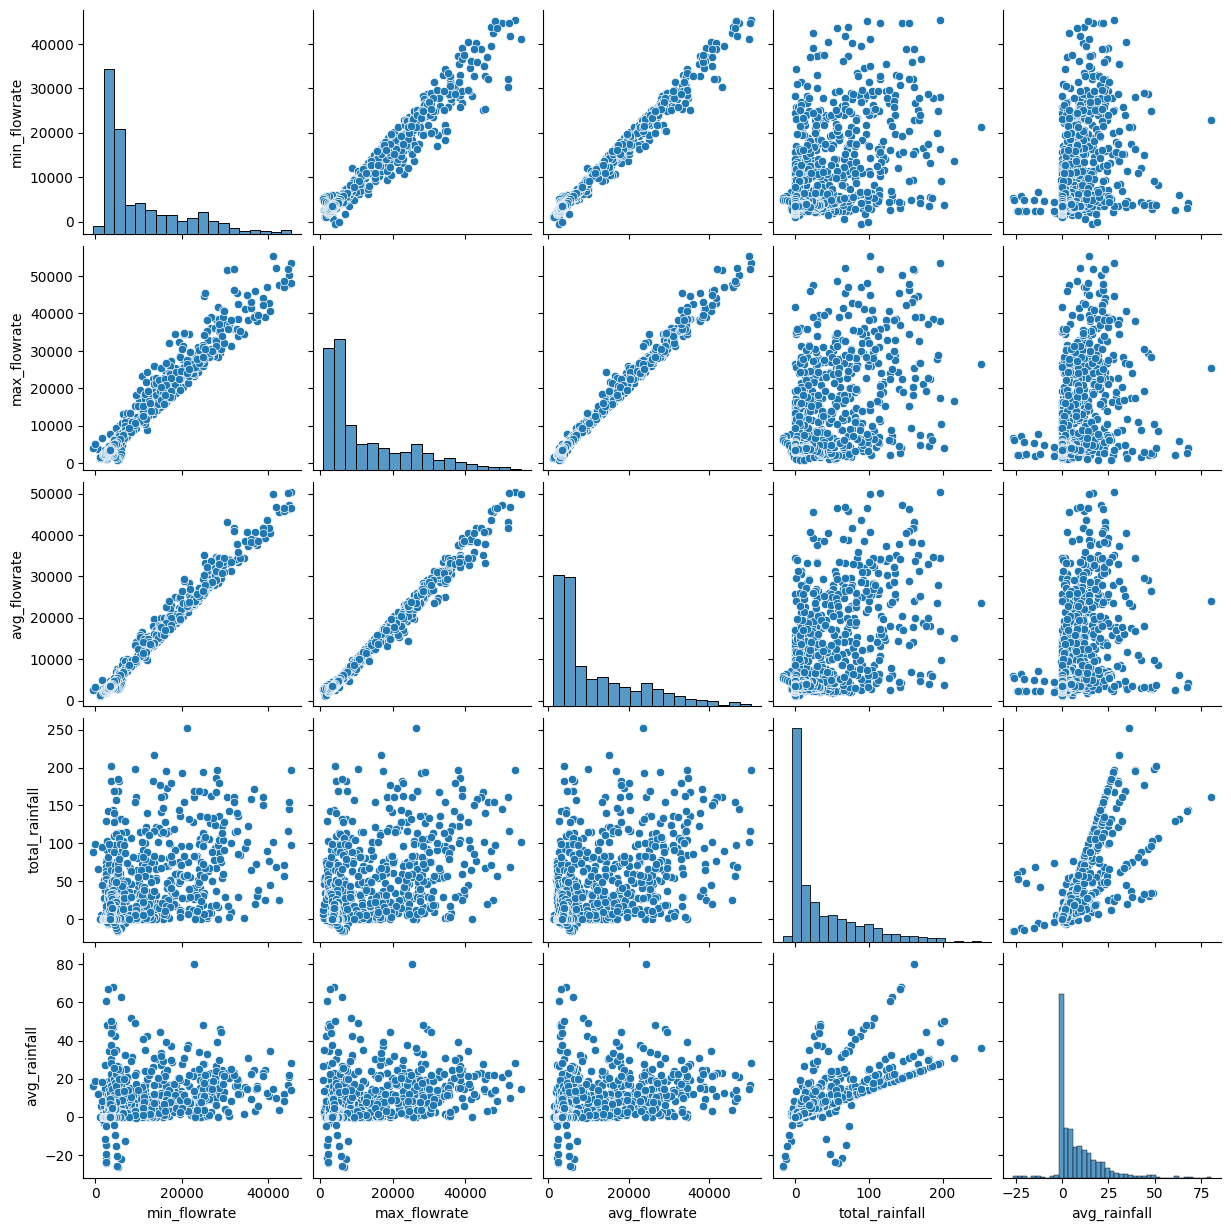

In [23]:
sns.pairplot(weekly_stats, vars=['min_flowrate', 'max_flowrate', 'avg_flowrate', 'total_rainfall', 'avg_rainfall'])
plt.show()

                            OLS Regression Results                            
Dep. Variable:           avg_flowrate   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     327.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.19e-62
Time:                        13:59:43   Log-Likelihood:                -9417.1
No. Observations:                 894   AIC:                         1.884e+04
Df Residuals:                     892   BIC:                         1.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7453.7668    380.611     19.

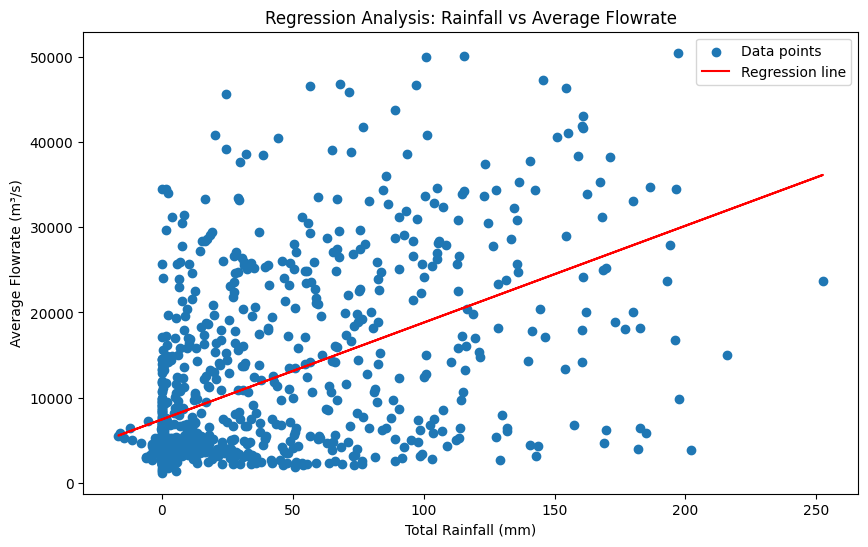

In [24]:
import statsmodels.api as sm

# Define the independent variables (X) and the dependent variable (y)
X = weekly_stats[['total_rainfall']]
y = weekly_stats['avg_flowrate']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(weekly_stats['total_rainfall'], weekly_stats['avg_flowrate'], label='Data points')
plt.plot(weekly_stats['total_rainfall'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Average Flowrate (m³/s)')
plt.title('Regression Analysis: Rainfall vs Average Flowrate')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:           avg_flowrate   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           7.06e-29
Time:                        13:59:43   Log-Likelihood:                -9494.7
No. Observations:                 894   AIC:                         1.899e+04
Df Residuals:                     892   BIC:                         1.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9031.1814    399.150     22.626   

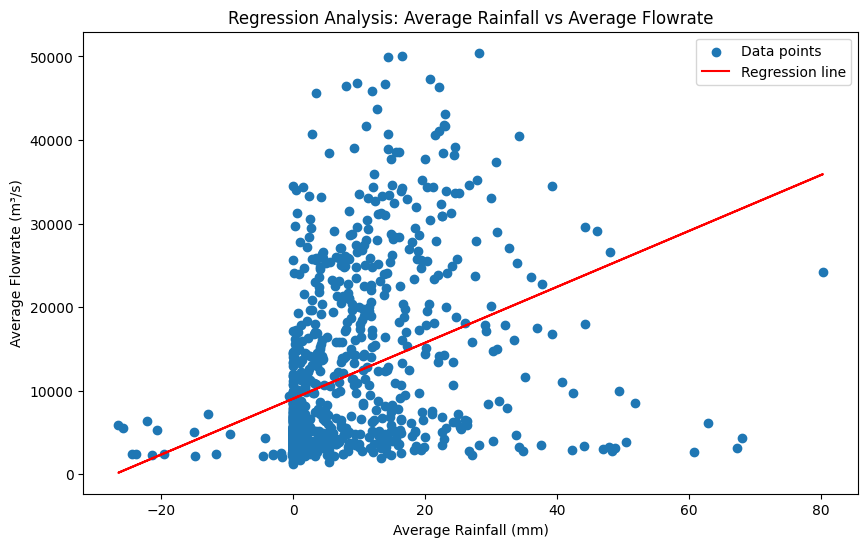

In [25]:
# Define the independent variables (X) and the dependent variable (y)
X = weekly_stats[['avg_rainfall']]
y = weekly_stats['avg_flowrate']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(weekly_stats['avg_rainfall'], weekly_stats['avg_flowrate'], label='Data points')
plt.plot(weekly_stats['avg_rainfall'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Average Flowrate (m³/s)')
plt.title('Regression Analysis: Average Rainfall vs Average Flowrate')
plt.legend()
plt.show()

                      min_flowrate_trend  max_flowrate_trend  \
min_flowrate_trend              1.000000            0.960171   
max_flowrate_trend              0.960171            1.000000   
avg_flowrate_trend              0.988994            0.989957   
total_rainfall_trend            0.362898            0.320293   

                      avg_flowrate_trend  total_rainfall_trend  
min_flowrate_trend              0.988994              0.362898  
max_flowrate_trend              0.989957              0.320293  
avg_flowrate_trend              1.000000              0.347457  
total_rainfall_trend            0.347457              1.000000  


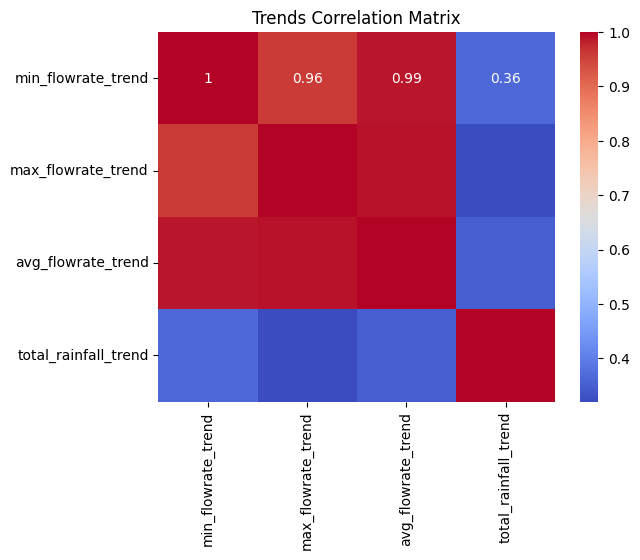

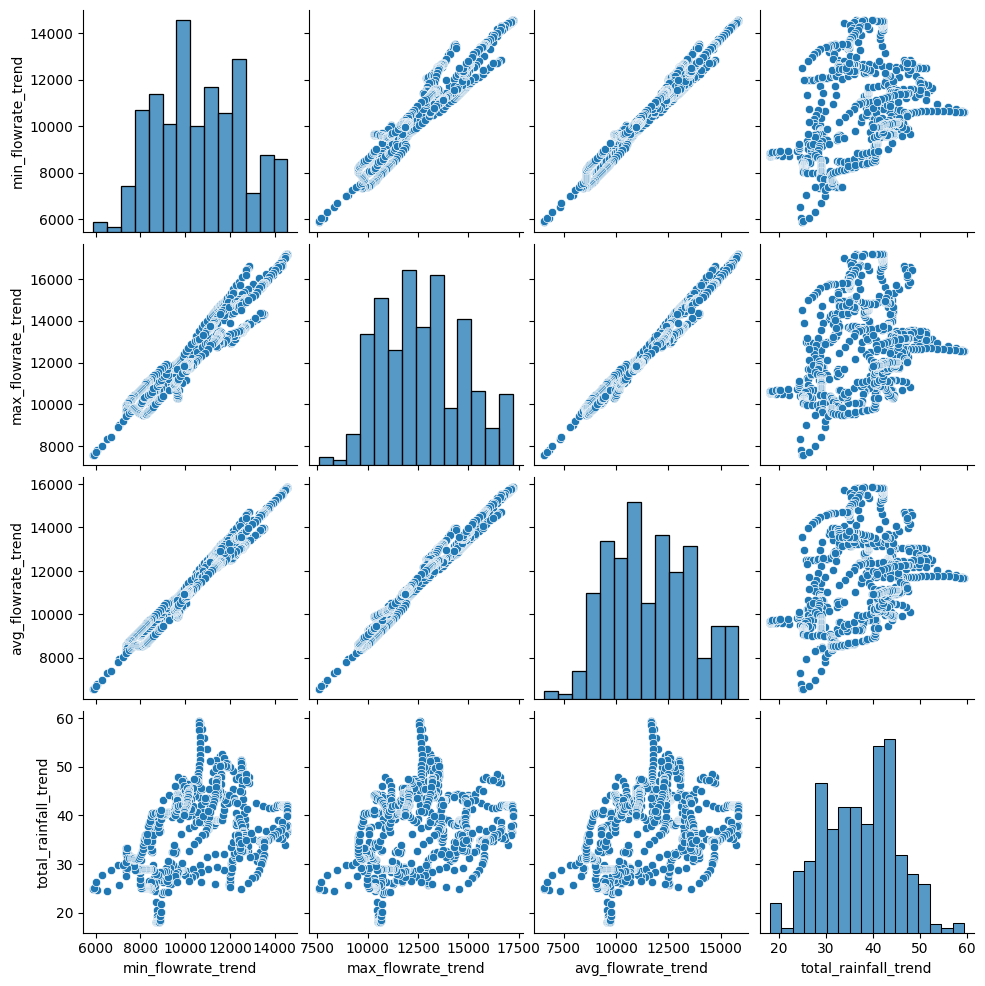

In [26]:
## analysis of trends correlations and gdp ##

trends_correlation_matrix = trends[['min_flowrate_trend', 'max_flowrate_trend', 'avg_flowrate_trend', 'total_rainfall_trend']].corr()
print(trends_correlation_matrix)

sns.heatmap(trends_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Trends Correlation Matrix')
plt.show()

sns.pairplot(trends, vars=['min_flowrate_trend', 'max_flowrate_trend', 'avg_flowrate_trend', 'total_rainfall_trend'])
plt.show()

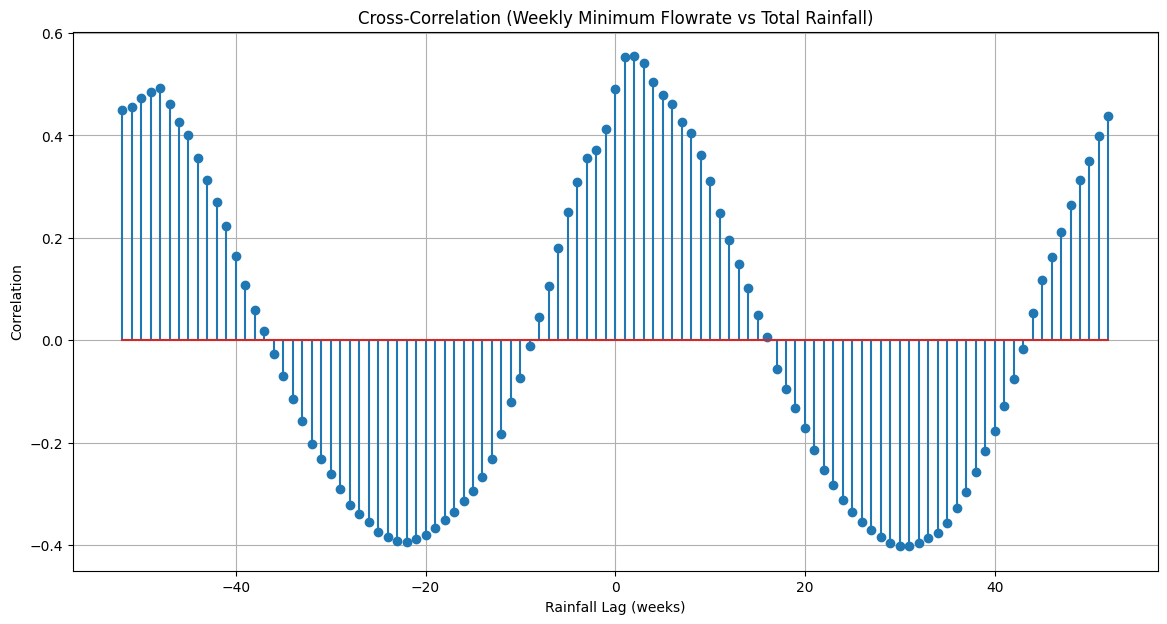

In [27]:
from scipy.signal import correlate

# Define a function to calculate cross-correlation
def cross_correlation(series1, series2, max_lag):
    correlation = [series1.corr(series2.shift(lag)) for lag in range(-max_lag, max_lag+1)]
    lags = range(-max_lag, max_lag+1)
    return lags, correlation

# Calculate cross-correlation
max_lag = 52  # One year lag
lags, correlation = cross_correlation(weekly_stats['min_flowrate'], weekly_stats['total_rainfall'], max_lag)

# Plot cross-correlation
plt.figure(figsize=(14, 7))
plt.stem(lags, correlation)
plt.xlabel('Rainfall Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-Correlation (Weekly Minimum Flowrate vs Total Rainfall)')
plt.grid(True)
plt.show()

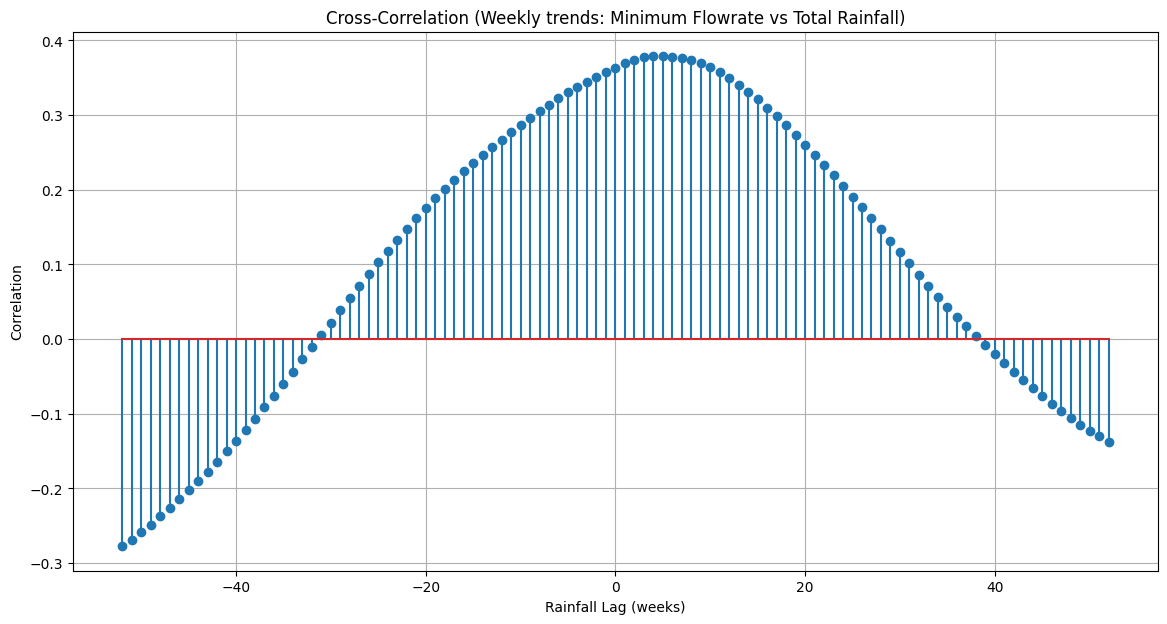

In [28]:
from scipy.signal import correlate

# Define a function to calculate cross-correlation
def cross_correlation(series1, series2, max_lag):
    correlation = [series1.corr(series2.shift(lag)) for lag in range(-max_lag, max_lag+1)]
    lags = range(-max_lag, max_lag+1)
    return lags, correlation

# Calculate cross-correlation
max_lag = 52  # One year lag
lags, correlation = cross_correlation(trends['min_flowrate_trend'], trends['total_rainfall_trend'], max_lag)

# Plot cross-correlation
plt.figure(figsize=(14, 7))
plt.stem(lags, correlation)
plt.xlabel('Rainfall Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-Correlation (Weekly trends: Minimum Flowrate vs Total Rainfall)')
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:           avg_flowrate   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     26.18
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          2.25e-137
Time:                        13:59:48   Log-Likelihood:                -8576.4
No. Observations:                 842   AIC:                         1.726e+04
Df Residuals:                     789   BIC:                         1.751e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7079.92

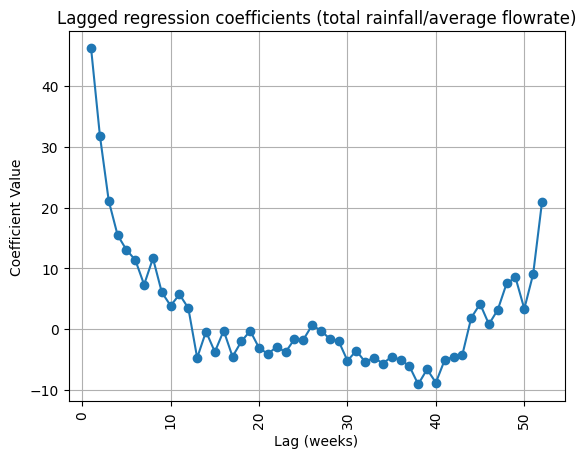

In [29]:
## Lagged regression ##

# Create lagged features for total rainfall
max_lag = 52
for lag in range(1, max_lag + 1):
    weekly_stats[f'total_rainfall_lag_{lag}'] = weekly_stats['total_rainfall'].shift(lag)

# Drop rows with NaN values resulting from the shift
lagged_data = weekly_stats.dropna()

# Define the target and predictors
X = lagged_data[[f'total_rainfall_lag_{lag}' for lag in range(1, max_lag + 1)]]
y = lagged_data['avg_flowrate']

# Add a constant term for the regression intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

x_array = np.array(range(1, max_lag + 1))
plt.plot(x_array , model.params[1:], marker='o')
plt.ylabel('Coefficient Value')
plt.xlabel('Lag (weeks)')
plt.xticks(rotation=90)
plt.title('Lagged regression coefficients (total rainfall/average flowrate)')
plt.grid(True)
plt.show()

In [30]:
from statsmodels.tsa.api import VAR

# Prepare the data
data_for_var = weekly_stats[['avg_flowrate', 'total_rainfall']].dropna()

# Fit the VAR model
model = VAR(data_for_var)
fitted_model = model.fit(maxlags=52, ic='aic')

# Print the summary of the model
print(fitted_model.summary())

# Forecasting
forecast_steps = 10  # Number of steps to forecast
forecast = fitted_model.forecast(data_for_var.values[-fitted_model.k_ar:], steps=forecast_steps)
print(forecast)


c:\Users\lelia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Jul, 2024
Time:                     13:59:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    23.5998
Nobs:                     882.000    HQIC:                   23.4324
Log likelihood:          -12741.0    FPE:                1.35378e+10
AIC:                      23.3287    Det(Omega_mle):     1.28018e+10
--------------------------------------------------------------------
Results for equation avg_flowrate
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   1123.321859       192.153637            5.846           0.000
L1.avg_flowrate            1.148246         0.035690           32.173           0.000
L1.total_rainfall         19.3989

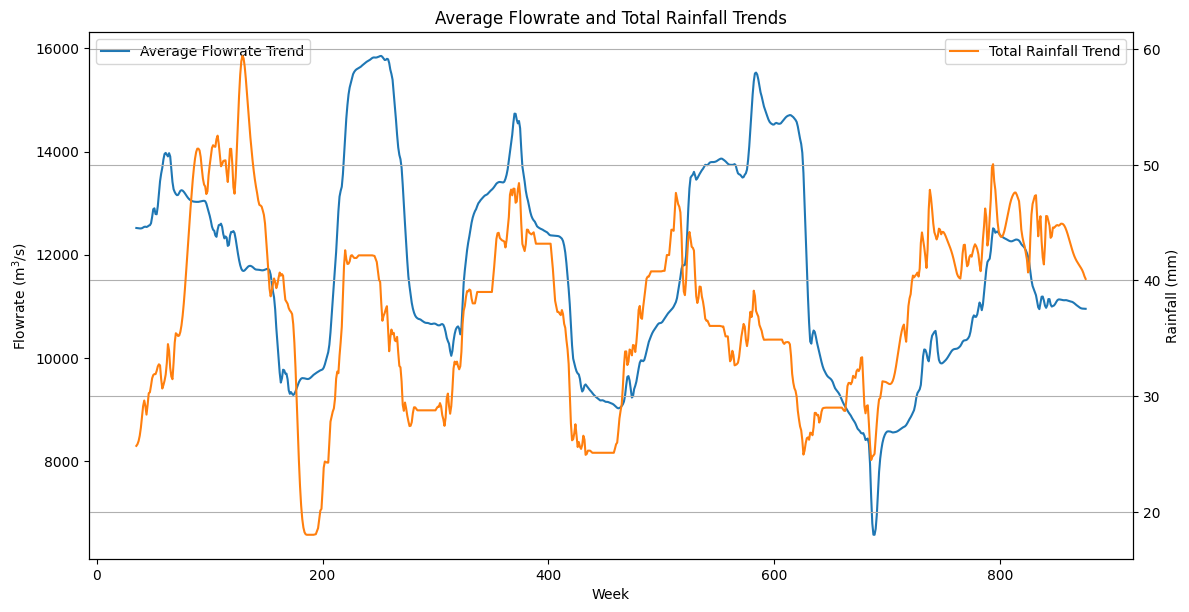

In [31]:
## plot average flow and rainfall trends

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Week')
ax1.set_ylabel('Flowrate (m$^3$/s)')
ax1.plot(trends['avg_flowrate_trend'], label='Average Flowrate Trend', color='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall (mm)')
ax2.plot(trends['total_rainfall_trend'], label='Total Rainfall Trend', color='tab:orange')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Average Flowrate and Total Rainfall Trends')
plt.grid(True)
plt.show()


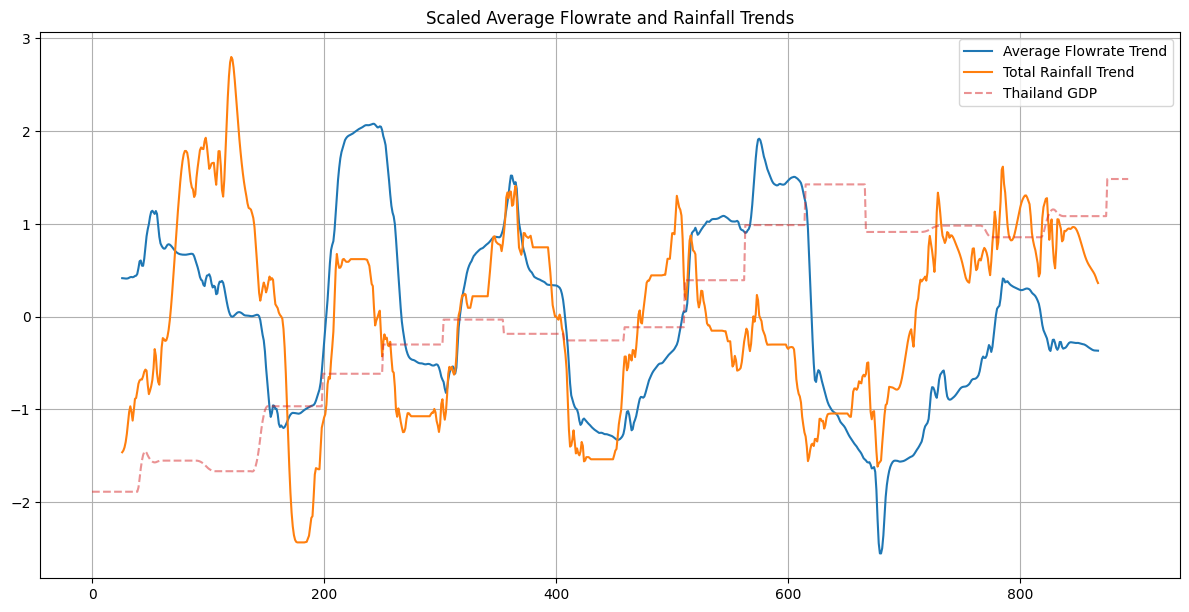

In [32]:
## plot average flow and rainfall trends
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scale the data
flow_scaler = StandardScaler()
rainfall_scaler = StandardScaler()
gdp_scaler = StandardScaler()
flow_scaled = flow_scaler.fit_transform(trends['avg_flowrate_trend'].values.reshape(-1, 1))
rain_scaled = rainfall_scaler.fit_transform(trends['total_rainfall_trend'].values.reshape(-1, 1))
thai_scaled = gdp_scaler.fit_transform(trends['gdp_thai'].values.reshape(-1, 1))
#viet_scaled = gdp_scaler.fit_transform(trends['gdp_viet'].values.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(flow_scaled, label='Average Flowrate Trend')
plt.plot(rain_scaled, label='Total Rainfall Trend', color='tab:orange')
plt.plot(thai_scaled, label='Thailand GDP', color='tab:red', linestyle='dashed', alpha=0.5)
#plt.plot(viet_scaled, label='Vietnam GDP', color='tab:green', linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.title('Scaled Average Flowrate and Rainfall Trends')
plt.grid(True)
plt.show()
